In [11]:
import cv2
import numpy as np
import imutils
import os


def pre_process_image(image_path):
    image = cv2.imread(image_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)

    # Find and remove horizontal and vertical lines using morphological operations
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))

    removed_horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    removed_vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

    inverse_binary = cv2.bitwise_not(binary)

    no_lines = cv2.bitwise_and(inverse_binary, inverse_binary, mask=cv2.bitwise_not(removed_horizontal_lines | removed_vertical_lines))

    no_lines = cv2.bitwise_not(no_lines)

    # Lighten the dark color using contrast and brightness adjustments
    alpha = 1.5
    beta = 50
    lightened_image = cv2.convertScaleAbs(no_lines, alpha=alpha, beta=beta)

    kernel = np.ones((4,4), np.uint8)
    dilated_image = cv2.dilate(lightened_image, kernel, iterations=1)

    kernel_erode = np.ones((4,4), np.uint8)
    eroded_image = cv2.erode(dilated_image, kernel_erode, iterations=1)
    return eroded_image

def contours_edge(image):

    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150)

    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    min_contour_area = 5

    # Filter and draw only the contours with an area above the threshold
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_contour_area]

    # Create an empty mask of the same size as the image
    mask = np.zeros_like(image)

    # Draw the selected contours on the mask
    cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Use the mask to extract the regions from the original image
    result = cv2.bitwise_and(image, mask)
    
    # cv2.imshow("contour.jpg", result)
    
    result = cv2.bitwise_not(result)

    return result

def preprocess_and_save_image(image_path, save_image_path):
    pre_processed_image = pre_process_image(image_path)
    contoured_image = contours_edge(pre_processed_image)
    cv2.imwrite(save_image_path, contoured_image)
    
base_image_path = "images (copy)"
save_image_path = "images"
images = os.listdir(base_image_path)
for img in images:
    preprocess_and_save_image(os.path.join(base_image_path, img), os.path.join(save_image_path, img))

In [2]:
# import cv2
# import numpy as np
# def pre_process_image(img):
#     # Convert the image to grayscale
#     print(img)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Apply adaptive thresholding to binarize the image
#     binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)

#     # Find and remove horizontal and vertical lines using morphological operations
#     horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
#     vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))

#     removed_horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
#     removed_vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

#     # Inverse the binary image to make lines white and text black
#     inverse_binary = cv2.bitwise_not(binary)

#     # Remove lines from the inverted binary image
#     no_lines = cv2.bitwise_and(inverse_binary, inverse_binary, mask=cv2.bitwise_not(removed_horizontal_lines | removed_vertical_lines))

#     # Invert the result back to have white text on a black background
#     no_lines = cv2.bitwise_not(no_lines)

#     # Lighten the dark color using contrast and brightness adjustments
#     alpha = 1.5  # Contrast control (adjust as needed)
#     beta = 50    # Brightness control (adjust as needed)
#     lightened_image = cv2.convertScaleAbs(no_lines, alpha=alpha, beta=beta)

#     kernel = np.ones((3,3), np.uint8)
#     dilated_image = cv2.dilate(lightened_image, kernel, iterations=1)

#     small_fragment_kernel = np.ones((7,7), np.uint8)
#     cleaned_image = cv2.morphologyEx(dilated_image, cv2.MORPH_OPEN, small_fragment_kernel, iterations=1)

#     kernel = np.ones((3,3), np.uint16)
#     dilated_image = cv2.dilate(cleaned_image, kernel, iterations=1)

#     # Add a slight erosion to refine the result
#     erode_kernel = np.ones((7,7), np.uint16)
#     eroded_image = cv2.erode(dilated_image, erode_kernel, iterations=1)
    
#     cv2.imshow(img, eroded_image)

In [3]:
# min_rect_width = 2  # Adjust this value as needed
# min_rect_height = 2  # Adjust this value as needed

# # Call the function with the image path and minimum rectangle dimensions
# image_path = "images (copy)/2a3d7R.png"
# pre_process_image(image_path)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
# min_contour_area = 100 
# image_path = "images"
# images = os.listdir(image_path)
# for image in images:
#     pre_process_image(os.path.join(image_path, image))

In [5]:
# import cv2
# import numpy as np


# def remove_small_fragments(image):
#     # Create a kernel for morphological operations to remove small fragments
#     small_fragment_kernel = np.ones((7,7), np.uint8)
#     cleaned_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, small_fragment_kernel, iterations=1)

#     kernel = np.ones((3,3), np.uint16)
#     dilated_image = cv2.dilate(cleaned_image, kernel, iterations=1)

#     # Add a slight erosion to refine the result
#     erode_kernel = np.ones((7,7), np.uint16)
#     eroded_image = cv2.erode(dilated_image, erode_kernel, iterations=1)

#     # # Perform dilation to fill gaps between characters
#     # gap_fill_kernel = np.ones((3,3), np.uint16)
#     # filled_image = cv2.dilate(eroded_image, gap_fill_kernel, iterations=1)
    
#     return eroded_image

# def pre_process_image(img):
#     # Convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Apply adaptive thresholding to binarize the image
#     binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)

#     # Find and remove horizontal and vertical lines using morphological operations
#     horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
#     vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))

#     removed_horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
#     removed_vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

#     # Inverse the binary image to make lines white and text black
#     inverse_binary = cv2.bitwise_not(binary)

#     # Remove lines from the inverted binary image
#     no_lines = cv2.bitwise_and(inverse_binary, inverse_binary, mask=cv2.bitwise_not(removed_horizontal_lines | removed_vertical_lines))

#     # Invert the result back to have white text on a black background
#     no_lines = cv2.bitwise_not(no_lines)

#     # Lighten the dark color using contrast and brightness adjustments
#     alpha = 1.5  # Contrast control (adjust as needed)
#     beta = 50    # Brightness control (adjust as needed)
#     lightened_image = cv2.convertScaleAbs(no_lines, alpha=alpha, beta=beta)
#     kernel = np.ones((3,3), np.uint8)
#     dilated_image = cv2.dilate(lightened_image, kernel, iterations=1)
    
#     small_fragment_kernel = np.ones((7,7), np.uint8)
#     cleaned_image = cv2.morphologyEx(dilated_image, cv2.MORPH_OPEN, small_fragment_kernel, iterations=1)

#     kernel = np.ones((3,3), np.uint16)
#     dilated_image = cv2.dilate(cleaned_image, kernel, iterations=1)

#     # Add a slight erosion to refine the result
#     erode_kernel = np.ones((7,7), np.uint16)
#     eroded_image = cv2.erode(dilated_image, erode_kernel, iterations=1)
#     return eroded_image

# # Path to the image file
# image_path = 'images/1R89Q8.png'

# # Initialize the PaddleOCR reader

# # Read the image using OpenCV
# image = cv2.imread(image_path)

# image = pre_process_image(image)

# cv2.imshow("Image", image)

# # Apply image preprocessing (dilation) before OCR
# # Define the kernel for the dilation operation

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-11-03 17:12:38.729576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 17:12:38.774724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 17:12:38.774781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 17:12:38.774838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 17:12:38.783110: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 17:12:38.783673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Path to the data directory
data_dir = Path("./images/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 8

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])
print("max_length:", max_length)

Number of images found:  1037
Number of labels found:  1037
Number of unique characters:  30
Characters present:  {'3', 'M', 'a', 'L', '1', 'R', 'T', 'K', 'k', 'W', 'F', 'E', 'm', '5', '8', 'H', 'e', '9', 'Q', 'A', 'l', 'y', 'Y', '7', 'B', '2', '6', 'N', 'd', 'b'}
max_length: 6


In [3]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))


def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

In [4]:
with open("vocab.txt", "w") as output:
    for item in char_to_num.get_vocabulary():
        output.write(item+"\n")

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

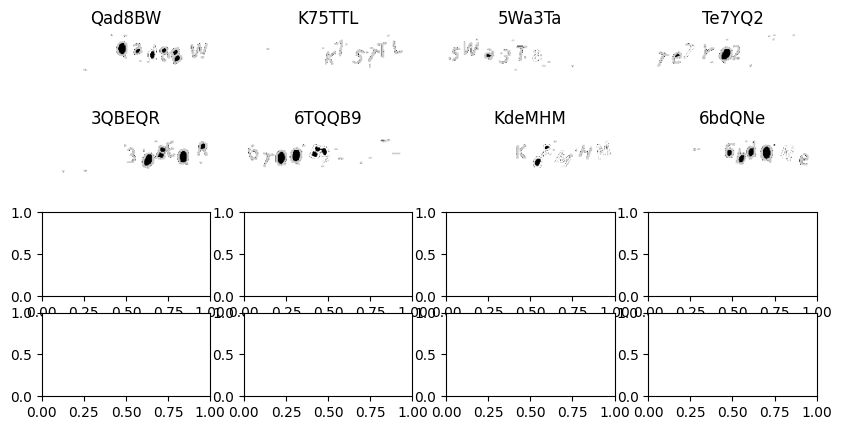

In [6]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(8):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [7]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 200, 50, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 200, 50, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 100, 25, 32)          0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 100, 25, 64)          18496     ['pool1[0][0]']               
                                                                                       

In [8]:
epochs = 200
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/200
117/117 [==============================] - 17s 95ms/step - loss: 24.1248 - val_loss: 20.9848
Epoch 2/200
117/117 [==============================] - 10s 85ms/step - loss: 21.0039 - val_loss: 20.9714
Epoch 3/200
117/117 [==============================] - 11s 90ms/step - loss: 20.9770 - val_loss: 20.9687
Epoch 4/200
117/117 [==============================] - 11s 91ms/step - loss: 20.9676 - val_loss: 20.9716
Epoch 5/200
117/117 [==============================] - 11s 90ms/step - loss: 20.9540 - val_loss: 20.9712
Epoch 6/200
117/117 [==============================] - 11s 91ms/step - loss: 20.9485 - val_loss: 20.9647
Epoch 7/200
117/117 [==============================] - 11s 91ms/step - loss: 20.9004 - val_loss: 20.8103
Epoch 8/200
117/117 [==============================] - 11s 92ms/step - loss: 20.6271 - val_loss: 20.4637
Epoch 9/200
117/117 [==============================] - 11s 90ms/step - loss: 20.2131 - val_loss: 19.9057
Epoch 10/200
117/117 [==============================] -

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 768)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            49216 

Trainable params: 434144 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 1s 1s/step


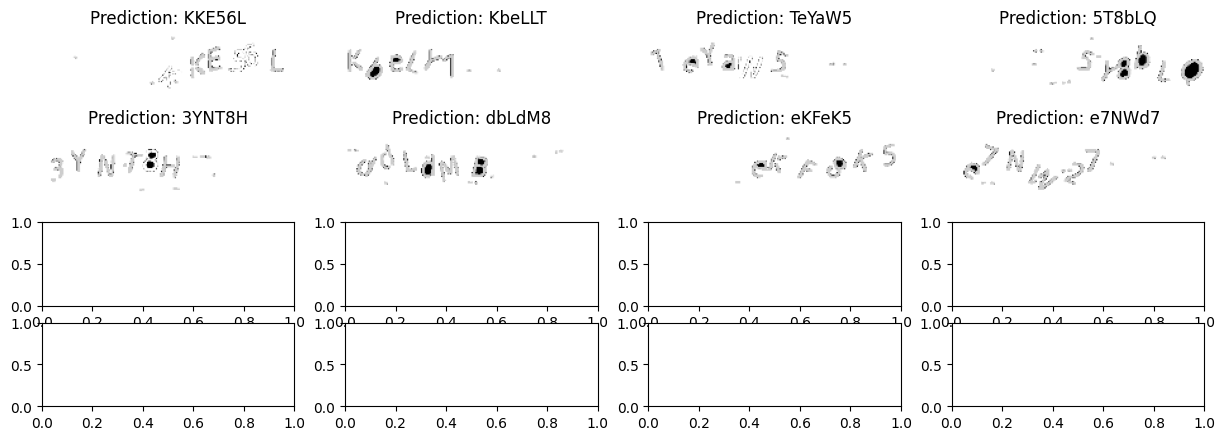

In [9]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [10]:
model.save('captcha_detection_v2')

INFO:tensorflow:Assets written to: captcha_detection_v2/assets


INFO:tensorflow:Assets written to: captcha_detection_v2/assets


In [16]:
model.save_weights('captcha_detection.h5')

In [24]:
model.save("captcha_detection_v1.keras")


In [9]:
loaded_model = keras.models.load_model("captcha_detection")

In [10]:
new_image_path = "images (copy)/2a3d7R.png"
output_image = 'captcha_image.png'

def preprocess_captcha(image_path):
    pre_processed_image = pre_process_image(image_path)
    contoured_image = contours_edge(pre_processed_image)

    cv2.imwrite(output_image, contoured_image)
    return contoured_image

captcha_image = preprocess_captcha(new_image_path)




In [11]:
def second_preprocess_captcha(img_path):
    img_width = 200
    img_height = 50
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])

    return img


new_captcha_image = second_preprocess_captcha(output_image)

In [13]:
prediction_model_v1 = keras.models.Model(
    loaded_model.get_layer(name="image").input, loaded_model.get_layer(name="dense2").output
)
prediction_model_v1.summary()

max_length = 6

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

# Predict the text from the preprocessed image
preds = prediction_model_v1.predict(np.expand_dims(new_captcha_image, axis=0))
pred_texts = decode_batch_predictions(preds)

# Print the predicted text
if len(pred_texts) > 0:
    print("Predicted Text:", pred_texts[0])
else:
    print("No text was predicted.")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 768)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            4921